In [5]:
#1

import numpy as np

a = 3  # параметр формы
b = 2  # параметр масштаба
N = 10000

sample = np.random.weibull(a, N) * b

print(sample[:10])

[1.58812685 1.34588241 2.47620978 1.57332508 1.4783558  1.15597808
 0.43678064 1.02058292 1.72344402 3.00763567]


In [8]:
#2.1

min_value = np.min(sample)
max_value = np.max(sample)
sample_mean = np.mean(sample)
sample_variance_unbiased = np.var(sample)
sample_variance_biased = np.var(sample, ddof=1)
sample_std_dev_biased = np.sqrt(sample_variance_biased)

print("Минимальное значение выборки:", min_value)
print("Максимальное значение выборки:", max_value)
print("Выборочное среднее:", sample_mean)
print("Выборочная дисперсия (неисправленная):", sample_variance_unbiased)
print("Выборочная дисперсия (исправленная):", sample_variance_biased)
print("Выборочное среднеквадратическое отклонение для исправленной дисперсии:", sample_std_dev_biased)


Минимальное значение выборки: 0.06955198197027268
Максимальное значение выборки: 4.088544591885928
Выборочное среднее: 1.7855494884823537
Выборочная дисперсия (неисправленная): 0.4218970512424801
Выборочная дисперсия (исправленная): 0.4219392451669968
Выборочное среднеквадратическое отклонение для исправленной дисперсии: 0.6495685069082374


In [9]:
#2.2

from scipy.special import gamma

# Теоретическое мат ожидание
mean_theoretical = b * gamma(1 + 1/a)

# Теоретическая дисперсия
variance_theoretical = (b ** 2) * (gamma(1 + 2/a) - (gamma(1 + 1/a)) ** 2)

print("Теоретическое мат ожидание:", mean_theoretical)
print("Теоретическая дисперсия:", variance_theoretical)
print("Разница между средним и мат ожиданием:", sample_mean - mean_theoretical)
print("Разница между исправ. выб. дисперсией и теор. дисперсией:", sample_variance_biased - variance_theoretical)


Теоретическое мат ожидание: 1.7859590231384979
Теоретическая дисперсия: 0.42133153947391655
Разница между средним и мат ожиданием: -0.0004095346561441282
Разница между исправ. выб. дисперсией и теор. дисперсией: 0.0006077056930802738


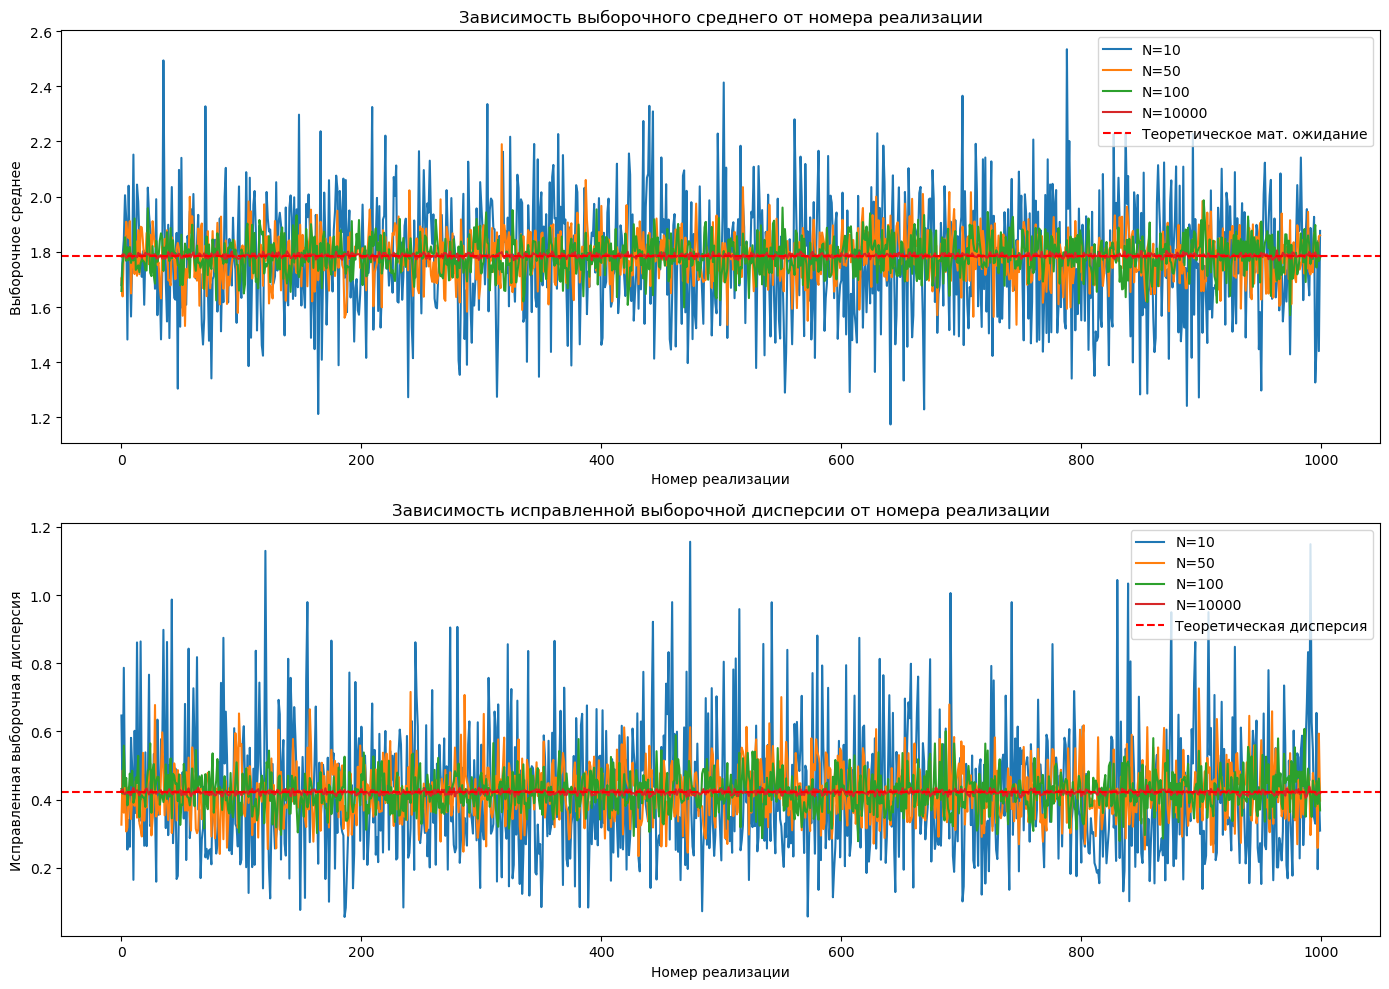

In [10]:
#2.3

import matplotlib.pyplot as plt

# Функция для расчета теоретического математического ожидания
def theoretical_mean(a, b):
    return b * gamma(1 + 1/a)

# Функция для расчета теоретической дисперсии
def theoretical_variance(a, b):
    return (b ** 2) * (gamma(1 + 2/a) - (gamma(1 + 1/a)) ** 2)

# Функция для генерации выборочных реализаций и вычисления выборочного среднего и исправленной выборочной дисперсии
def generate_sample_stats(N, num_realizations):
    means = []
    variances = []
    for _ in range(num_realizations):
        sample = np.random.weibull(a, N) * b
        sample_mean = np.mean(sample)
        sample_variance_biased = np.var(sample, ddof=1)
        means.append(sample_mean)
        variances.append(sample_variance_biased)
    return means, variances

# Объемы выборки
N_values = [10, 50, 100, 10000]

# Генерируем выборочные реализации и вычисляем выборочные средние и дисперсии для каждого объема выборки
realizations = 1000
sample_means = []
sample_variances = []
for N in N_values:
    means, variances = generate_sample_stats(N, realizations)
    sample_means.append(means)
    sample_variances.append(variances)

# Теоретические значения математического ожидания и дисперсии
theoretical_mean_value = theoretical_mean(a, b)
theoretical_variance_value = theoretical_variance(a, b)

# Построение графиков
plt.figure(figsize=(14, 10))

# График зависимости выборочного среднего от номера реализации
plt.subplot(2, 1, 1)
for i, N in enumerate(N_values):
    plt.plot(range(realizations), sample_means[i], label=f"N={N}")
plt.axhline(y=theoretical_mean_value, color='r', linestyle='--', label="Теоретическое мат. ожидание")
plt.xlabel('Номер реализации')
plt.ylabel('Выборочное среднее')
plt.title('Зависимость выборочного среднего от номера реализации')
plt.legend()

# График зависимости исправленной выборочной дисперсии от номера реализации
plt.subplot(2, 1, 2)
for i, N in enumerate(N_values):
    plt.plot(range(realizations), sample_variances[i], label=f"N={N}")
plt.axhline(y=theoretical_variance_value, color='r', linestyle='--', label="Теоретическая дисперсия")
plt.xlabel('Номер реализации')
plt.ylabel('Исправленная выборочная дисперсия')
plt.title('Зависимость исправленной выборочной дисперсии от номера реализации')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
#2.4
# Генерация выборочных реализаций и вычисление выборочного среднего и исправленной выборочной дисперсии
N = 10000
num_realizations = 1000
sample_means, sample_variances = generate_sample_stats(N, num_realizations)

# Вычисление среднего от выборочного среднего и среднего от исправленной выборочной дисперсии
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_variances = np.mean(sample_variances)

# Вычисление теоретического математического ожидания и дисперсии для сравнения
theoretical_mean_value = theoretical_mean(a, b)
theoretical_variance_value = theoretical_variance(a, b)

print("Среднее от выборочного среднего:", mean_of_sample_means)
print("Среднее от исправленной выборочной дисперсии:", mean_of_sample_variances)
print("Теоретическое математическое ожидание:", theoretical_mean_value)
print("Теоретическая дисперсия:", theoretical_variance_value)


Среднее от выборочного среднего: 1.7859381606529683
Среднее от исправленной выборочной дисперсии: 0.42125551575365855
Теоретическое математическое ожидание: 1.7859590231384979
Теоретическая дисперсия: 0.42133153947391655


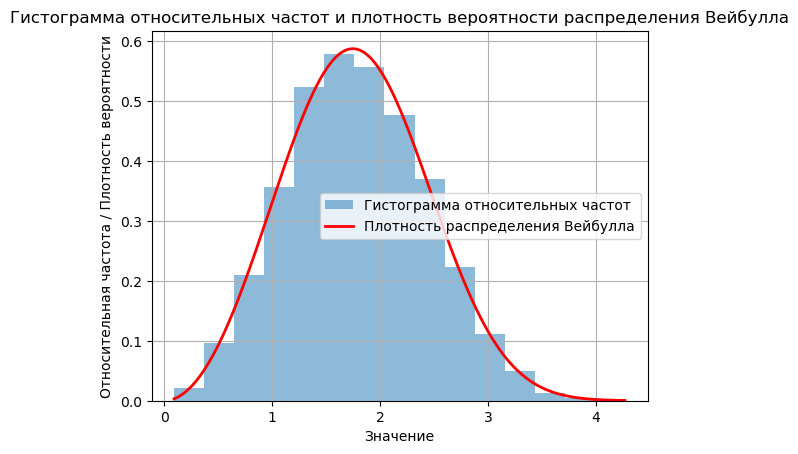

In [16]:
#3
from scipy.stats import weibull_min

# А) Находим минимальное и максимальное значение в выборке
xmin = np.min(sample)
xmax = np.max(sample)

# Б) Рассчитываем количество интервалов группировки r по формуле Стерджеса
r = int(np.ceil(1 + np.log2(len(sample))))

# В) Находим ширину каждого интервала группировки
h = (xmax - xmin) / r

# Получаем массив границ интервалов группировки
z = np.linspace(xmin, xmax, r+1)

# Г) Считаем количество значений выборки, попавших в каждый интервал группировки
hist, _ = np.histogram(sample, bins=z)

# Д) Строим гистограмму относительных частот и график плотности вероятности
x = np.linspace(xmin, xmax, 1000)
plt.hist(sample, bins=z, density=True, alpha=0.5, label='Гистограмма относительных частот')

plt.plot(x, weibull_min.pdf(x, a, loc=0, scale=b), 'r-', lw=2, label='Плотность распределения Вейбулла')
plt.xlabel('Значение')
plt.ylabel('Относительная частота / Плотность вероятности')
plt.title('Гистограмма относительных частот и плотность вероятности распределения Вейбулла')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#4
# Рассчет выборочного среднего по группированным данным
grouped_mean = np.sum((hist / len(sample)) * (z[:-1] + h/2))

# Рассчет выборочной дисперсии по группированным данным
grouped_variance = np.sum((hist / len(sample)) * ((z[:-1] + h/2 - grouped_mean) ** 2))

# Вывод результатов
print("Выборочное среднее (по группированным данным):", grouped_mean)
print("Выборочная дисперсия (по группированным данным):", grouped_variance)
print("\nВыборочное среднее (из пункта 2):", sample_mean)
print("Выборочная дисперсия (из пункта 2):", sample_variance_biased)
print("\nТеоретическое математическое ожидание:", theoretical_mean_value)
print("Теоретическая дисперсия:", theoretical_variance_value)


Выборочное среднее (по группированным данным): 1.7895876404208075
Выборочная дисперсия (по группированным данным): 0.42264083650457196

Выборочное среднее (из пункта 2): 1.7855494884823537
Выборочная дисперсия (из пункта 2): 0.4219392451669968

Теоретическое математическое ожидание: 1.7859590231384979
Теоретическая дисперсия: 0.42133153947391655


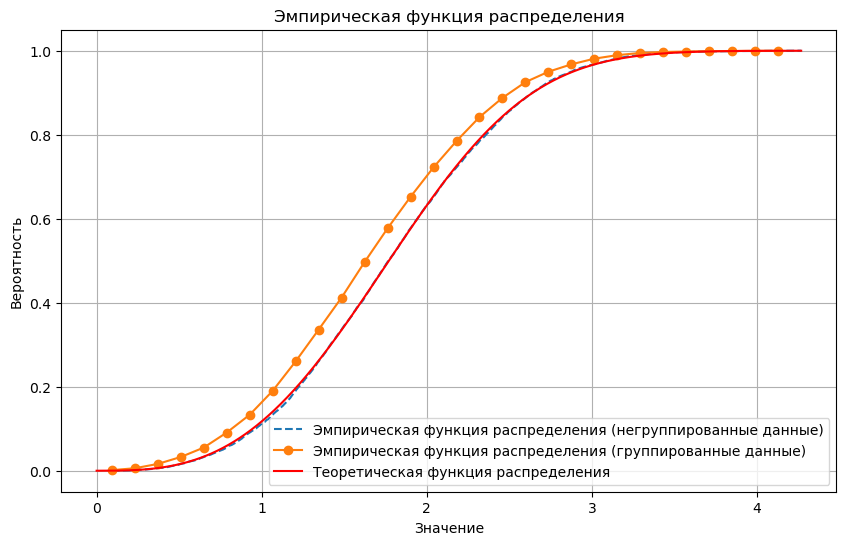

In [17]:
#5

# Рассчитываем эмпирическую функцию распределения для негруппированных данных
x_sorted = np.sort(sample)
F_empirical = np.arange(1, len(x_sorted) + 1) / len(x_sorted)

# Группированные данные
hist, bins = np.histogram(sample, bins=30, density=True)
cumulative_density_grouped = np.cumsum(hist * np.diff(bins))

# Рассчитываем теоретическую функцию распределения для сравнения
x_theoretical = np.linspace(0, np.max(sample), 1000)
F_theoretical = weibull_min.cdf(x_theoretical, a, loc=0, scale=b)

plt.figure(figsize=(10, 6))
plt.plot(x_sorted, F_empirical, label='Эмпирическая функция распределения (негруппированные данные)', linestyle='--')
plt.plot(bins[:-1], cumulative_density_grouped, label='Эмпирическая функция распределения (группированные данные)', marker='o')
plt.plot(x_theoretical, F_theoretical, label='Теоретическая функция распределения', color='red')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция распределения')
plt.legend()
plt.grid(True)
plt.show()
